<a href="https://colab.research.google.com/github/shangeth/Monte-Carlo-Prediction/blob/master/Off_Policy_Learning_with_Importance_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Off-Policy Monte Carlo with Importance Sampling
## Off Policy Learning

By exploration-exploitation trade-off, the agent should take sub-optimal exploratory action by which the agent may receive less reward. One way of exploration is by using an epsilon-greedy policy, where the agent takes a nongreedy action with a small probability.

In an on-policy, improvement and evaluation are done on the policy which is used to select actions.

In off-policy, improvement and evaluation are done on a different policy from the one used to select actions. the policy learned is off the policy used for action selection while gathering episodes.

- Target Policy $\pi(a/s)$ : The value function of learning is based on $\pi(a/s)$. We want the target policy to be the optimal policy $\pi^{*}(a/s)$. The target policy will be used for action selection after the learning process is complete(deployment).
- Behavior Policy $b(a/s)$: Behavior policy is used for action selection while gathering episodes to train the agent. This generally follows an exploratory policy.

## Importance Sampling

We have a random variable $x \sim b$ sampled from behavior policy distribution $b$. We want to estimate the expected value of $x$ wrt the target distribution $\pi$ ie: $E_{\pi}[X]$. The sample average will give the expected value of x under b $E_{b}[X]$.

$E_{\pi}[X] = \sum x \pi(x)$ where $x \in X$

$ \qquad = \sum x \pi(x) \dfrac{b(x)}{b(x)}$

$ \qquad = \sum x \dfrac{\pi(x)}{b(x)} b(x)$

$ \qquad = \sum x \rho(x) b(x)$ 

where $\rho(x) = \dfrac{\pi(x)}{b(x)}$ and is called the importance sampling ratio.

\
Let $x\rho(x)$ be a new random variable $X_\rho(X)$.
Then, $E_{\pi}[X] = \sum x \rho(x) b(x) = E_{b}[X_{\rho}(X)]$. Now we have expectation under $b$ instead of $\pi$.

\
### How do we estimating expectation from the data? 
Compute the weighted sample average with importance sampling ratio as the weights.
$E_{\pi}[X] = \sum x \rho(x) b(x) = E_{b}[X_{\rho}(X)] \approx \dfrac{1}{n}\sum_{i=1}^{n}x_i \rho(x_i)$ and $x_i \sim b$


## Off Policy Monte Carlo Prediction with Importance Sampling

In Monte Carlo prediction, we estimate the value of each state by computing a sample average over returns starting from that state. $V_{\pi}(s) = E_{\pi}[G_t|S_t=s]$

\
In off-policy, we are trying to estimate value under the target policy $\pi(s)$ using returns following the behavior policy $b(s)$. As discussed above, we need to find the value of $\rho$ for each of the sampled returns. $\rho$ is the probability of trajectory under $\pi$ divided by the probability of trajectory under $b$.

$V_{\pi}(s) = E_{b}[\rho G_t|S_t=s]$ ; $\rho = \dfrac{P(trajectory\ under\ \pi)}{P(trajectory\ under\ b)}$

\
The probaility of a trajectory under a policy can be given by
$P(trajectory\ under\ policy) = P(A_t, S_{t+1}, A_{t+1}, ..., S_T| S_t, A_{t:T})$

where all actions are taken under the policy $b$.

\
As this is a Markov process, we can split the probability terms into

$P(A_t, S_{t+1}, A_{t+1}, ..., S_T| S_t, A_{t:T}) = b(A_t|S_t)p(S_{t+1}|S_t, A_t)*b(A_{t+1}|S_{t+1}) p(S_{t+2}|S_{t+1}, A_{t+1})*...p(S_{T}|S_{T-1}, A_{T-1})$

\
$b(A_t|S_t)p(S_{t+1}|S_t, A_t)$ give the probability of action $A_t$ at state $S_t$ times the probability of the state transition to state $S_{t+1}$

$P(A_t, S_{t+1}, A_{t+1}, ..., S_T| S_t, A_{t:T}) = \prod_{k=1}^{T} b(A_k|S_k)p(S_{k+1}|S_k, A_k)$


$\rho = \dfrac{P(trajectory\ under\ \pi)}{P(trajectory\ under\ b)}$

$\quad = \prod_{k=t}^{T-1}\dfrac{\pi(A_k|S_k)p(S_{k+1}|S_k, A_k)}{b(A_k|S_k)p(S_{k+1}|S_k, A_k)}$

$\rho = \prod_{k=t}^{T-1}\dfrac{\pi(A_k|S_k)}{b(A_k|S_k)}$

## Incremental Implementation of Off-policy MC

Suppose we have a sequence of returns $G_1, G_2, ...G_{n-1}$ all starting in the same state and with corresponding weights $W_i$, then the weighted average of returns $V_n = \dfrac{\sum_{k=1}^{n-1} W_kG_k}{\sum_{k=1}^{n-1} W_k}$ , $n \geq 2$ and the cumulative sum of weights $C_{n+1} = C_n + W_{n+1}$ where $C_0 = 0$.

The update rule for $V_{n+1} = V_n + \dfrac{W_n}{C_n}[G_n-V_n]$, $n \geq 1$ and $V_1$ is arbitrary.

Here $W_n$ will be the importance sampling weight.

## Greedy $\pi$ policy
When the target policy $\pi$ is $\epsilon$ greedy, it is determenistic and $\pi(A_t/S_t) = 1$ . So $\rho = \prod_{k=t}^{T-1}\dfrac{1}{b(A_k|S_k)}$ and $W$ can be updated with $W \leftarrow W \dfrac{1}{b(A_t|S_t)}$ for each time step in the trajectory.

So the Off policy Monte Carlo Control algorithm is
![](https://i.stack.imgur.com/Xi0vX.png)

# Off-Policy MC Control with Weighted Importance in Python

## BlackJack Environment

In [0]:
import sys
import gym
import numpy as np
from collections import defaultdict

In [2]:
env = gym.make('Blackjack-v0')

print(vars(env), end='\n\n')
print(dir(env))

{'action_space': Discrete(2), 'observation_space': Tuple(Discrete(32), Discrete(11), Discrete(2)), 'np_random': RandomState(MT19937) at 0x7FE1148D2888, 'natural': False, 'dealer': [10, 1], 'player': [10, 1], 'spec': EnvSpec(Blackjack-v0)}

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_obs', 'action_space', 'close', 'dealer', 'metadata', 'natural', 'np_random', 'observation_space', 'player', 'render', 'reset', 'reward_range', 'seed', 'spec', 'step', 'unwrapped']


In [3]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [4]:
random_state = env.reset()
print('Random State', random_state)

random_action = env.action_space.sample()
print('Random Action', random_action)

Random State (18, 2, False)
Random Action 1


## Generate Random Eposides

In [5]:
num_episodes = 3

for i in range(num_episodes):
    print('Episode : ', i+1)
    state = env.reset()
    step = 0
    while True:
        step +=1
        action = env.action_space.sample()
        print('Step = {}\t State = {}\t Action Taken = {}'.format(step, state, action))
        state, reward, done, info = env.step(action)
        if done:
            print('Game Ended...')
            if reward > 0: print('Agent Won!\n')
            else: print('Agent Lost!\n')
            break

Episode :  1
Step = 1	 State = (10, 7, False)	 Action Taken = 1
Step = 2	 State = (21, 7, True)	 Action Taken = 1
Step = 3	 State = (15, 7, False)	 Action Taken = 1
Step = 4	 State = (18, 7, False)	 Action Taken = 0
Game Ended...
Agent Lost!

Episode :  2
Step = 1	 State = (20, 8, False)	 Action Taken = 0
Game Ended...
Agent Won!

Episode :  3
Step = 1	 State = (12, 7, False)	 Action Taken = 1
Step = 2	 State = (15, 7, False)	 Action Taken = 0
Game Ended...
Agent Won!



## Training 

In [0]:
def random_policy(nA):
    A = np.ones(nA, dtype=float) / nA
    def policy_fn(observation):
        return A
    return policy_fn
    
def greedy_policy(Q):
    def policy_fn(state):
        A = np.zeros_like(Q[state], dtype=float)
        best_action = np.argmax(Q[state])
        A[best_action] = 1.0
        return A
    return policy_fn
    
def mc_off_policy(env, num_episodes, behavior_policy, max_time=100, discount_factor=1.0):
    Q = defaultdict(lambda:np.zeros(env.action_space.n))
    C = defaultdict(lambda:np.zeros(env.action_space.n))

    target_policy = greedy_policy(Q)

    for i_episode in range(1, num_episodes+1):
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        episode = []
        state = env.reset()
        for t in range(max_time):
            probs = behavior_policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        G = 0.0
        W = 1.0
        for t in range(len(episode))[::-1]:
            state, action, reward = episode[t]
            G = discount_factor * G + reward
            C[state][action] += W
            Q[state][action] += (W / C[state][action]) * (G - Q[state][action])
            if action !=  np.argmax(target_policy(state)):
                break
            W = W * 1./behavior_policy(state)[action]
    return Q, target_policy

In [18]:
random_policy = random_policy(env.action_space.n)
Q, policy = mc_off_policy(env, num_episodes=500000, behavior_policy=random_policy)

Episode 500000/500000.

## Plot

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_policy(policy):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in policy:
            return policy[x,y,usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(10, 0, -1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])
        plt.xticks(x_range)
        plt.yticks(y_range)
        plt.gca().invert_yaxis()
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.grid(color='w', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
            
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

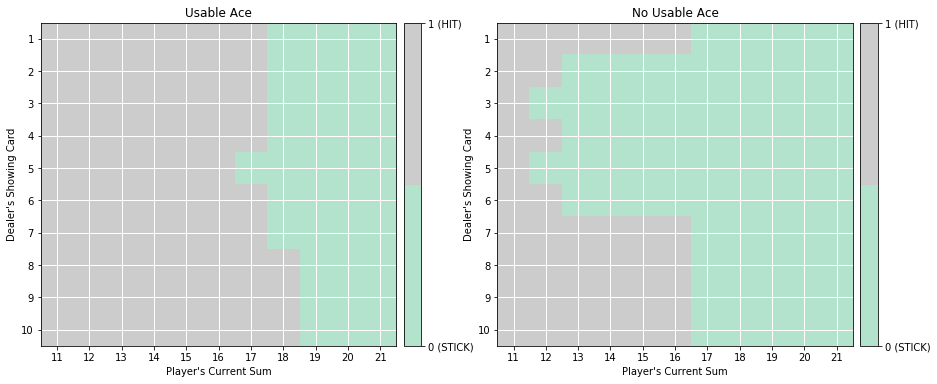

In [20]:
policy = dict((k,np.argmax(v)) for k, v in Q.items())
plot_policy(policy)